In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import requests
import os
from matplotlib import cycler #Modificación de los valores estándar del aspecto de las gráficas.
from mpl_toolkits import mplot3d #Librería para gráficas 3D.
from scipy import stats

plt.style.use('seaborn-whitegrid')

### <strong>Distribución normal</strong>

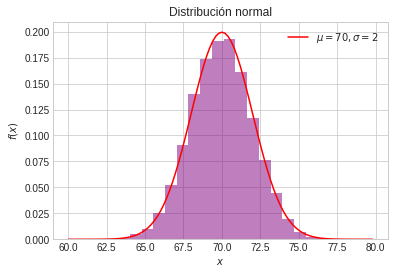

In [2]:
mean = 70
sigma = 2

x = np.arange(60,80,0.2)
s_g = np.random.normal(70,2,10000)
gauss = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp( - (x - mean) ** 2 / (2 * sigma ** 2))

plt.hist(s_g, 20, density = True, alpha = 0.5, color = 'purple')
plt.plot(x, gauss, color = 'red', label = '$\mu = 70, \sigma = 2$')
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.title('Distribución normal')
plt.show()

Por definición, la <strong>probabilidad acumulada</strong> se determina haciendo una suma en los valores de la función de distribución de probabilidad.

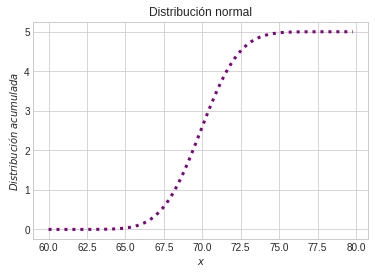

In [3]:
#Con este método se suman las probabilidades hasta que tiende a 1, la suma de todas las probabilidades.
suma_g = [] #Variable donde se guarda el valor de la suma.
aux = 0 #Variable auxiliar en la que se acumula la suma del arreglo gauss.
for i in range(len(gauss)):
    aux += gauss[i]
    suma_g.append(aux) 
plt.plot(x, suma_g, color = 'purple', linestyle = ':', lw = 3)
plt.xlabel('$x$')
plt.ylabel('$Distribución$ $acumulada$')
plt.title('Distribución normal')
plt.show()

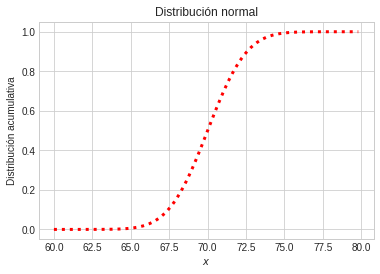

In [4]:
#Se comprueba al hacer uso de la función stats.norm().cdf().
inversa = stats.norm(70, 2).cdf(x)
plt.plot(x, inversa, linestyle = ':', color = 'red', lw = 3)
plt.xlabel('$x$')
plt.ylabel('Distribución acumulativa')
plt.title('Distribución normal')
plt.show()

In [5]:
np.abs(suma_g - inversa) <= 0.05 #Los valores por los dos métodos son consistentes con esta tolerancia.

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

### <strong>Distribución binomial</strong>

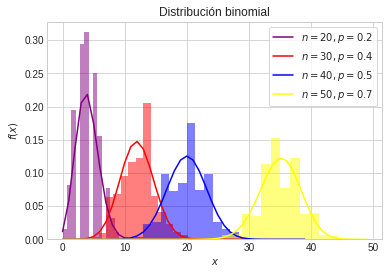

In [6]:
n = [20, 30, 40, 50]
p = [0.2, 0.4, 0.5, 0.7]
s_b = []
binomial = []
colores = ['purple', 'red', 'blue', 'yellow']

for i in range(4):
    s_b.append([])
    binomial.append([])
for j in range(4):
    s_b[j] = np.random.binomial(n[j], p[j], 1000000)
    x_b = np.array(np.arange(0, n[j], 1))
    for i in range(len(x_b)):
        binomial[j].append(math.factorial(n[j]) * (p[j] ** x_b[i]) * ((1 - p[j]) ** (n[j] - x_b[i])) /
                           (math.factorial(x_b[i]) * math.factorial(n[j] - x_b[i])))
    plt.hist(s_b[j], bins = 20, density = True, alpha = 0.5, color = colores[j])
    plt.plot(x_b, binomial[j], color = colores[j], label = '$n = {}, p = {}$'.format(n[j], p[j]))
plt.legend(frameon = True)
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.title('Distribución binomial')
plt.show()

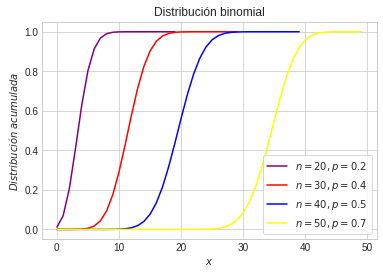

In [7]:
#Con este método se suman las probabilidades hasta que tiende a 1, la suma de todas las probabilidades.
suma_b = [] #Variable donde se guarda el valor de la suma.
aux = 0 #Variable auxiliar en la que se acumula la suma del arreglo gauss.

for i in range(4):
    suma_b.append([])

for j in range(4):
    x_b = np.array(np.arange(0, n[j], 1))
    for i in range(len(binomial[j])):
        aux += binomial[j][i]
        suma_b[j].append(aux) 
    plt.plot(x_b, suma_b[j], color = colores[j], label = '$n = {}, p = {}$'.format(n[j], p[j]))
    aux = 0
plt.legend(frameon = True)
plt.xlabel('$x$')
plt.ylabel('$Distribución$ $acumulada$')
plt.title('Distribución binomial')
plt.show()

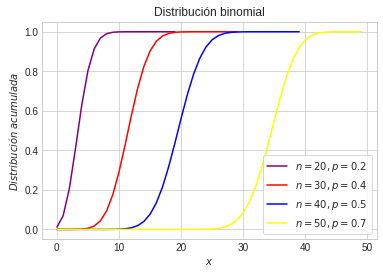

In [8]:
#Ahora con la función que pertenece a scipy de Python:
suma_b = [] #Variable donde se guarda el valor de la suma.
aux = 0 #Variable auxiliar en la que se acumula la suma del arreglo gauss.
inversa_b = []

for i in range(4):
    inversa_b.append([])

for j in range(4):
    x_b = np.array(np.arange(0, n[j], 1))
    inversa_b[j] = stats.binom(n[j], p[j]).cdf(x_b)
    plt.plot(x_b, inversa_b[j], color = colores[j], label = '$n = {}, p = {}$'.format(n[j], p[j]))
    aux = 0
plt.legend(frameon = True)
plt.xlabel('$x$')
plt.ylabel('$Distribución$ $acumulada$')
plt.title('Distribución binomial')
plt.show()

### <strong>Distribución de Poisson</strong>

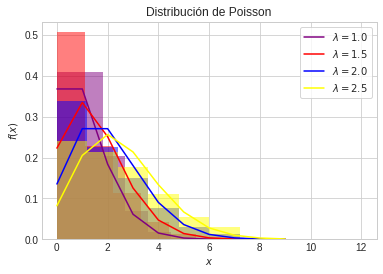

In [104]:
lambd = [1.0, 1.5, 2.0, 2.5]
s_p = []
poisson = []
tam = 10

for i in range(4):
    s_p.append([])
    poisson.append([])
for j in range(4):
    s_p[j] = np.random.poisson(lambd[j], 1000000)
    x_p = np.array(np.arange(0, tam, 1))
    for i in range(len(x_p)):
        poisson[j].append(np.exp(- lambd[j]) * (lambd[j] ** x_p[i]) / math.factorial(x_p[i]))
    plt.hist(s_p[j], bins = 10, density = True, alpha = 0.5, color = colores[j])
    plt.plot(x_p, poisson[j], color = colores[j], label = '$\lambda = {}$'.format(lambd[j]))
plt.legend(frameon = True)
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.title('Distribución de Poisson')
plt.show()

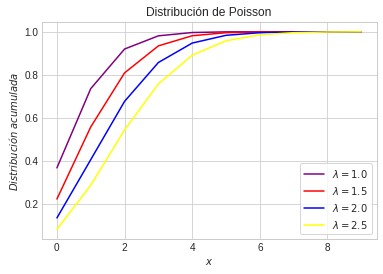

In [106]:
#Con este método se suman las probabilidades hasta que tiende a 1, la suma de todas las probabilidades.
suma_p = [] #Variable donde se guarda el valor de la suma.
aux = 0 #Variable auxiliar en la que se acumula la suma del arreglo gauss.

for i in range(4):
    suma_p.append([])

for j in range(4):
    x_p = np.array(np.arange(0, tam, 1))
    for i in range(len(x_p)):
        aux += poisson[j][i]
        suma_p[j].append(aux) 
    plt.plot(x_p, suma_p[j], color = colores[j], label = '$\lambda = {}$'.format(lambd[j]))
    aux = 0
plt.legend(frameon = True)
plt.xlabel('$x$')
plt.ylabel('$Distribución$ $acumulada$')
plt.title('Distribución de Poisson')
plt.show()

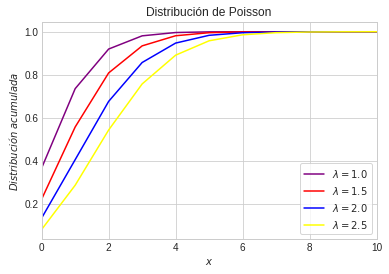

In [28]:
#Ahora con la función que pertenece a scipy de Python:
inversa_p = []

for i in range(4):
    inversa_p.append([])

for j in range(4):
    x_p = np.array(np.arange(0, n[j], 1))
    inversa_p[j] = stats.poisson(lambd[j]).cdf(x_p)
    plt.plot(x_p, inversa_p[j], color = colores[j], label = '$\lambda = {}$'.format(lambd[j]))
plt.legend(frameon = True)
plt.xlabel('$x$')
plt.ylabel('$Distribución$ $acumulada$')
plt.title('Distribución de Poisson')
plt.xlim(0.0, 10.0)
plt.show()

### <strong>Distribución Chi Cuadrada</strong>

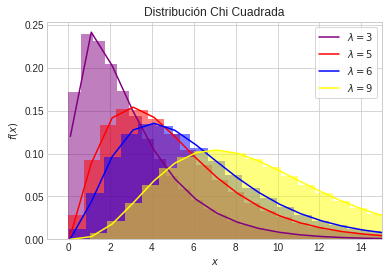

In [102]:
n_x = [3, 5, 6, 9]
s_x = []
chi = []
tam = 20

for i in range(4):
    s_x.append([])
    chi.append([])
for j in range(4):
    s_x[j] = np.random.chisquare(n_x[j], 1000000)
    x_x = np.array(np.arange(0.1, tam + 0.1, 1))
    for i in range(len(x_x)):
        chi[j].append(((x_x[i] / 2) ** (n_x[j] / 2 - 1)) * (np.exp(- x_x[i] / 2)) / 
                      ((2) * math.gamma(n_x[j] / 2)))
    plt.hist(s_x[j], bins = 50, density = True, alpha = 0.5, color = colores[j])
    plt.plot(x_x, chi[j], color = colores[j], label = '$\lambda = {}$'.format(n_x[j]))
plt.legend(frameon = True)
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.title('Distribución Chi Cuadrada')
plt.xlim(-1,15)
plt.show()

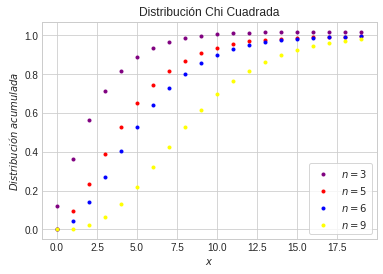

In [101]:
#Con este método se suman las probabilidades hasta que tiende a 1, la suma de todas las probabilidades.
suma_x = [] #Variable donde se guarda el valor de la suma.
aux = 0 #Variable auxiliar en la que se acumula la suma del arreglo gauss.

for i in range(4):
    suma_x.append([])

for j in range(4):
    x_x = np.array(np.arange(0.0, tam, 1))
    for i in range(len(x_x)):
        aux += chi[j][i]
        suma_x[j].append(aux) 
    plt.plot(x_x, suma_x[j], '.', lw = 4, color = colores[j], label = '$n = {}$'.format(n_x[j]))
    aux = 0
plt.legend(frameon = True)
plt.xlabel('$x$')
plt.ylabel('$Distribución$ $acumulada$')
plt.title('Distribución Chi Cuadrada')
plt.show()

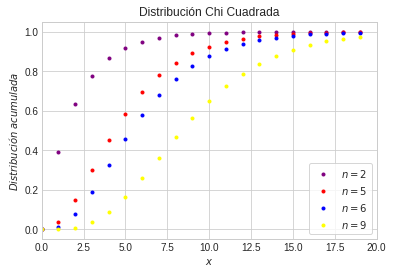

In [87]:
#Ahora con la función que pertenece a scipy de Python:
inversa_x = []

for i in range(4):
    inversa_x.append([])

for j in range(4):
    x_x = np.array(np.arange(0, tam, 1))
    inversa_x[j] = stats.chi2(n_x[j]).cdf(x_x)
    plt.plot(x_x, inversa_x[j], '.', lw = 5, color = colores[j], label = '$n = {}$'.format(n_x[j]))
plt.legend(frameon = True)
plt.xlabel('$x$')
plt.ylabel('$Distribución$ $acumulada$')
plt.title('Distribución Chi Cuadrada')
plt.xlim(0,20)
plt.show()

### <strong>Distribución Beta</strong>

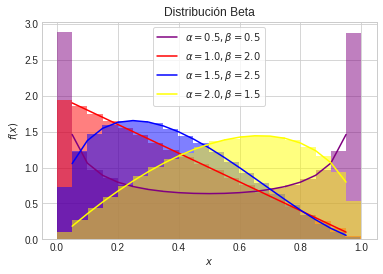

array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])

In [149]:
alpha = [0.5, 1.0, 1.5, 2.0]
beta = [0.5, 2.0, 2.5, 1.5]
s_b = []
betaf = []

for i in range(4):
    s_b.append([])
    betaf.append([])
for j in range(4):
    s_b[j] = np.random.beta(alpha[j], beta[j], 1000000)
    x_b = np.array(np.arange(0.05, 1, 0.05))
    for i in range(len(x_b)):
        betaf[j].append(math.gamma(alpha[j] + beta[j]) * (x_b[i] ** (alpha[j] - 1))
                        * ((1 - x_b[i]) ** (beta[j] - 1)) / (math.gamma(alpha[j]) * math.gamma(beta[j])))
    plt.hist(s_b[j], bins = 20, density = True, alpha = 0.5, color = colores[j])
    plt.plot(x_b, betaf[j], color = colores[j], label = '$\\alpha = {}, \\beta = {}$'.format(alpha[j],
                                                                                             beta[j]))
plt.legend(frameon = True)
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.title('Distribución Beta')
plt.show()
x_b

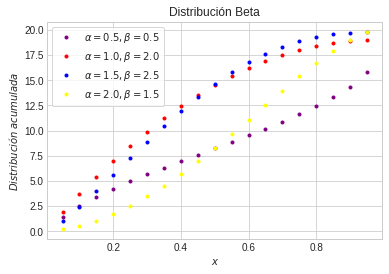

In [150]:
#Con este método se suman las probabilidades hasta que tiende a 1, la suma de todas las probabilidades.
suma_b = [] #Variable donde se guarda el valor de la suma.
aux = 0 #Variable auxiliar en la que se acumula la suma del arreglo gauss.

for i in range(4):
    suma_b.append([])

for j in range(4):
    x_b = np.array(np.arange(0.05, 1, 0.05))
    for i in range(len(x_b)):
        aux += betaf[j][i]
        suma_b[j].append(aux) 
    plt.plot(x_b, suma_b[j], '.', lw = 4, color = colores[j], label = '$\\alpha = {}, \\beta = {}$'.format(alpha[j], beta[j]))
    aux = 0
plt.legend(frameon = True)
plt.xlabel('$x$')
plt.ylabel('$Distribución$ $acumulada$')
plt.title('Distribución Beta')
plt.show()

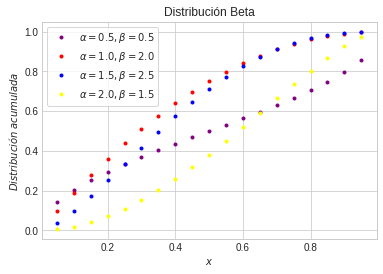

In [138]:
#Ahora con la función que pertenece a scipy de Python:
inversa_b = []

for i in range(4):
    inversa_b.append([])

for j in range(4):
    x_b = np.array(np.arange(0.05, 1, 0.05))
    inversa_b[j] = stats.beta(alpha[j], beta[j]).cdf(x_b)
    plt.plot(x_b, inversa_b[j], '.', lw = 5, color = colores[j], label = '$\\alpha = {}, \\beta = {}$'.format(alpha[j], beta[j]))
plt.legend(frameon = True)
plt.xlabel('$x$')
plt.ylabel('$Distribución$ $acumulada$')
plt.title('Distribución Beta')
plt.show()